In [1]:
import numpy as np 
from ncon import ncon 
from scipy.linalg import expm
import matplotlib.pyplot as plt 

$$
H = J\sum_{<i,j>} \sigma_i^z \sigma_j^z - h \sum_j \sigma_j^x
$$

In [8]:
def ITF(J,h):
    D = 10;
    d = 2;
    δ = 0.1;
    n_iter = 500;
    tol = 1e-4
    ΓA = np.random.rand(D,d,D);
    ΓA = ΓA / np.linalg.norm(ΓA)
    ΓB = np.random.rand(D,d,D);
    ΓB = ΓB / np.linalg.norm(ΓB)
    λA = np.ones(D) / np.sqrt(D);
    λB = np.ones(D) / np.sqrt(D);
    Γ = [ΓA, ΓB];
    λ = [λA, λB];
    X = np.array([[0,1],[1,0]])
    Z = np.array([[1,0],[0,-1]])
    Id = np.array([[1,0],[0,1]])
    Hzz = ncon([Z,Z],[[-1,-3],[-2,-4]])
    Hxx = 0.5*(ncon([X,Id],[[-1,-3],[-2,-4]]) + ncon([Id,X],[[-1,-3],[-2,-4]]))
    Mag = ncon([Z,Z],[[-1,-3],[-2,-4]])
    H = J*Hzz - h*Hxx
    Hexp = np.reshape(H,[d*d,d*d])
    Ug = expm(-δ*Hexp)
    Ug = np.reshape(Ug,[d,d,d,d])
    ##############
    θ = ncon([np.diag(λ[1]), Γ[1], np.diag(λ[1]), Γ[1], np.diag(λ[1])],
          [[-1,1],[1,-2,2],[2,3],[3,-4,4],[4,-3]])
    nrm_θ = ncon([θ,θ.conj()],[[1,2,3,4],[1,2,3,4]])
    e0 = ncon([θ,H,θ.conj()],[[1,2,3,4],[2,4,5,6],[1,5,3,6]])
    ###############
    for j in range(n_iter):
        A = np.mod(j,2)
        B = np.mod(j+1,2)
        θ1 = ncon([np.diag(λ[B]), Γ[A], np.diag(λ[A]), Γ[B], np.diag(λ[B])],
                  [[-1,1],[1,-2,2],[2,3],[3,-4,4],[4,-3]])
        e_numerator = ncon([θ1,H,θ1.conj()],[[1,2,3,4],[2,4,5,6],[1,5,3,6]])
        e_denomirator = ncon([θ1,θ1.conj()],[[1,2,3,4],[1,2,3,4]])
        e = e_numerator / e_denomirator 
        # numerator / denominator
        if np.abs(e-e0) < tol:
#             print("j = {}, E-E0 = {}".format(j,np.abs(E-E0)))
#             print("Success!")
            break
#         print("j = {}, Δ = {}".format(j,np.abs(E-E0)))
        e0 = e
        θ1 = ncon([θ1,Ug],[[-1,1,-3,2],[1,2,-2,-4]])
        θ1 = np.reshape(θ1,[D*d,D*d])
        U,S,V = np.linalg.svd(θ1)
        Γ[A] = U[:,0:D]
        λ[A] = S[0:D]
        Γ[B] = V[0:D,:]
        Γ[A] = np.reshape(Γ[A],[D,d,D])
        Γ[B] = np.reshape(Γ[B], [D,d,D])
        λ[A] = λ[A] / np.linalg.norm(λ[A])
        Γ[A] = ncon([np.diag(1./λ[B]), Γ[A]],[[-1,1],[1,-2,-3]])
        Γ[B] = ncon([Γ[B], np.diag(1./λ[B])],[[-1,-2,1],[1,-3]])
        Γ[A] = Γ[A] / np.linalg.norm(Γ[A])
        Γ[B] = Γ[B] / np.linalg.norm(Γ[B])
    E = []
    M = []
    for j in range(len(λ)):
        A = np.mod(j,2)
        B = np.mod(j+1,2)
        θ = ncon([np.diag(λ[B]), Γ[A], np.diag(λ[A]), Γ[B], np.diag(λ[B])],
                 [[-1,1],[1,-2,2],[2,3],[3,-4,4],[4,-3]])
        E_num = ncon([θ,H,θ.conj()],[[1,2,3,4],[2,4,5,6],[1,5,3,6]])
        m = ncon([θ,Mag,θ.conj()],[[1,2,3,4],[2,4,5,6],[1,5,3,6]])
        norm_θ = ncon([θ,θ.conj()],[[1,2,3,4],[1,2,3,4]])
        E_0 = E_num / norm_θ 
        m = m / norm_θ
        E.append(E_0)
        M.append(m)
    E_total = np.sum(E)
    M_total = np.sum(M)
    E_zero = E_total/2
    M_0 = M_total / 2
    return E_zero, M_0



In [9]:
h = np.arange(0,3,0.1)
E = []
M = []
for j in h:
    e, m = ITF(1,j)
    E.append(e)
    M.append(m)

NameError: name 'h' is not defined

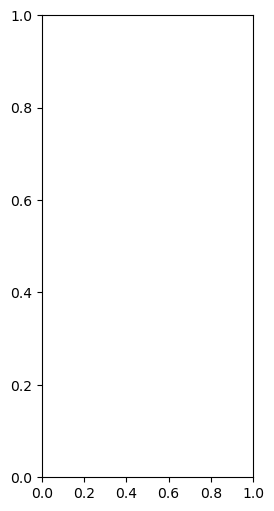

In [2]:
plt.figure(figsize=(6,6))
plt.subplot(121)
plt.scatter(h,E)
plt.subplot(122)
plt.scatter(h,M)
plt.show()

In [2]:
def ITF_2(J,h):
    D = 10;
    d = 2;
    δ = 0.1;
    n_iter = 1000;
    tol = 1e-1
    ΓA = np.random.rand(D,d,D);
    ΓB = np.random.rand(D,d,D);
    ΓA = ΓA / np.max(ΓA);
    ΓB = ΓB / np.max(ΓB);
    λA = np.random.rand(D) 
    λA = λA / np.max(λA)
    λB = np.random.rand(D)
    λB = λB / np.max(λB)
    Γ = [ΓA, ΓB];
    λ = [λA, λB];
    X = np.array([[0,1],[1,0]])
    Z = np.array([[1,0],[0,-1]])
    Id = np.array([[1,0],[0,1]])
    Hzz = ncon([Z,Z],[[-1,-3],[-2,-4]])
    Hxx = 0.5*(ncon([X,Id],[[-1,-3],[-2,-4]]) + ncon([Id,X],[[-1,-3],[-2,-4]]))
    Mag = ncon([Z,Z],[[-1,-3],[-2,-4]])
    H = J*Hzz - h*Hxx
    Hexp = np.reshape(H,[d*d,d*d])
    Ug = expm(-δ*Hexp)
    Ug = np.reshape(Ug,[d,d,d,d])
    ###############
    
    for j in range(n_iter):
        A = np.mod(j,2)
        B = np.mod(j+1,2)
        θ = ncon([np.diag(λ[B]), Γ[A], np.diag(λ[A]), Γ[B], np.diag(λ[B])],
                  [[-1,1],[1,-2,2],[2,3],[3,-4,4],[4,-3]])
        nrm_θ = ncon([θ,θ.conj()],[[1,2,3,4],[1,2,3,4]])
        θ = θ / np.sqrt(nrm_θ)
        θ_new = ncon([θ,Ug],[[-1,1,-3,2],[1,2,-2,-4]])
        nrm_θ_new = ncon([θ_new,θ_new.conj()],[[1,2,3,4],[1,2,3,4]])
        θ_new = θ_new / np.sqrt(nrm_θ_new)
        if np.linalg.norm(θ_new - θ) < tol:
#             print("j = {}, Diff: {}".format(j,np.linalg.norm(θ_new - θ)))
            θ = θ_new
            print("Success!")
            break
#         print("j = {}, Diff is: {}".format(j, np.linalg.norm(θ_new - θ)))
        θ = θ_new
        θ = np.reshape(θ,[D*d,D*d])
        U,S,V = np.linalg.svd(θ)
        Γ[A] = U[:,0:D]
        λ[A] = S[0:D]
        Γ[B] = V[0:D,:]
        Γ[A] = np.reshape(Γ[A],[D,d,D])
        Γ[B] = np.reshape(Γ[B], [D,d,D])
        λ[A] = λ[A] / np.linalg.norm(λ[A])
        Γ[A] = ncon([np.diag(1./λ[B]), Γ[A]],[[-1,1],[1,-2,-3]])
        Γ[B] = ncon([Γ[B], np.diag(1./λ[B])],[[-1,-2,1],[1,-3]])
        Γ[A] = Γ[A] / np.linalg.norm(Γ[A])
        Γ[B] = Γ[B] / np.linalg.norm(Γ[B])
#         Γ[A] = Γ[A] / np.max(Γ[A])
#         Γ[B] = Γ[B] / np.max(Γ[B])

        
    E = []
    M = []
    for j in range(len(λ)):
        A = np.mod(j,2)
        B = np.mod(j+1,2)
        θ = ncon([np.diag(λ[B]), Γ[A], np.diag(λ[A]), Γ[B], np.diag(λ[B])],
                 [[-1,1],[1,-2,2],[2,3],[3,-4,4],[4,-3]])
        nrm_θ = ncon([θ,θ.conj()],[[1,2,3,4],[1,2,3,4]])
        θ = θ / np.sqrt(nrm_θ)
        e = ncon([θ,H,θ.conj()],[[1,2,3,4],[2,4,5,6],[1,5,3,6]])
        m = ncon([θ,Mag,θ.conj()],[[1,2,3,4],[2,4,5,6],[1,5,3,6]])
        E.append(e)
        M.append(m)
    E_total = np.sum(E)
    M_total = np.sum(M)
    E_zero = E_total/2
    M_0 = M_total /2
    return E_zero, M_0

In [3]:
ITF_2(1,0.3)

Success!


(-0.2957305841973108, -0.0120053736974393)

In [4]:
h = np.arange(-1,3,0.1)
E = []
M = []
for j in h:
#     print("j = ", j)
    e, m = ITF_2(1,j)
    E.append(e)
    M.append(m)
print("Done")

Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Done


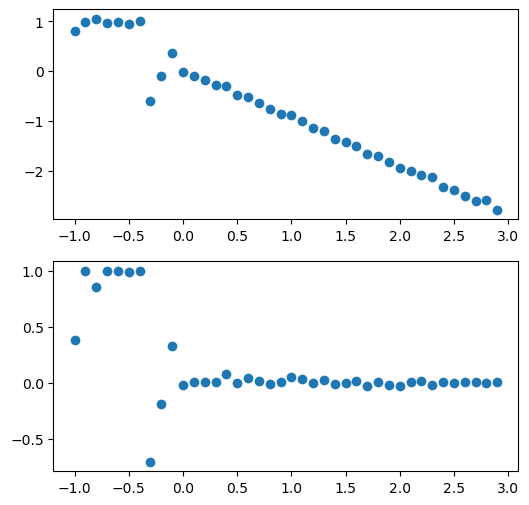

In [5]:
plt.figure(figsize=(6,6))
plt.subplot(211)
plt.scatter(h,E)
plt.subplot(212)
plt.scatter(h,M)
plt.show()

In [1]:
import numpy as np 
from ncon import ncon 

In [43]:
def ITF(J,h):
    """
    h: transverse field strength
    J: coupling strength between spins
    Returns the Ising Transverse Field Hamiltonian as a tensor network.
    """
    Sz = np.array([[1,0],[0,-1]])
    Sx = np.array([[0,1],[1,0]])
    id_tensor = np.eye(2)
    local_terms = [id_tensor - h*Sx, -J*Sz]
#     tn_network = ncon(local_terms, [(-1,1),(1,-2)])
    tn_network2 = -J*np.kron(Sz,Sz) -h/2*(np.kron(Sx,Id)+np.kron(Id,Sx))
    return tn_network2

In [45]:
ITF(1,0.5)

array([[-1.  , -0.25, -0.25,  0.  ],
       [-0.25,  1.  ,  0.  , -0.25],
       [-0.25,  0.  ,  1.  , -0.25],
       [ 0.  , -0.25, -0.25, -1.  ]])

In [50]:
# Perform one iTEBD step
def itebd_step(psi, A, B, tau):
    """
    psi: the initial MPS tensor network
    A: tensors used to update the left-canonical form
    B: tensors used to update the right-canonical form
    tau: imaginary time step
    Returns the updated MPS tensor network.
    """
    # Apply imaginary time evolution gates
    U_A = ncon.ncon([A, np.diag(np.exp(-tau))], [(1, 2), (-1, -2)])
    U_B = ncon.ncon([B, np.diag(np.exp(-tau))], [(-1, 2), (-2, 1)])
    
    psi = ncon.ncon([U_A, psi, U_B], [(1, -1, 2), (-2, 1, -3), (2, -4, 1)])
  
    # Perform singular value decomposition (SVD)
    psi = psi.reshape((A.shape[2], A.shape[0] * psi.shape[1] * psi.shape[2] * B.shape[0], B.shape[2]))
    U, S, V = np.linalg.svd(psi, full_matrices=False)
    
    # Truncate the bond dimensions
    chi = min(A.shape[1], B.shape[1], len(S))
    A = U[:, :chi].reshape((A.shape[2], A.shape[0], chi))
    B = V[:chi, :].reshape((chi, B.shape[0], B.shape[2]))
    return psi, A, B

In [51]:
def itebd_algorithm(psi, A, B, h, J, tau, num_steps):
    """
    psi: the initial MPS tensor network
    A: tensors used to update the left-canonical form
    B: tensors used to update the right-canonical form
    h: transverse field strength
    J: coupling strength between spins
    tau: imaginary time step
    num_steps: number of iTEBD steps to perform
    Returns the final MPS tensor network after performing iTEBD.
    """
    for step in range(num_steps):
        psi, A, B = itebd_step(psi, A, B, tau)
        
    return psi

In [52]:
# Example usage
# Set the parameters
N = 10  # Number of qubits
h = 1.0  # Transverse field strength
J = 0.5  # Coupling strength between spins
tau = 0.1  # Imaginary time step
num_steps = 100  # Number of iTEBD steps to perform

# Create initial MPS
A_init = np.random.rand(2, 1, 2)
B_init = np.random.rand(2, 1, 2)

# Generate the Ising Transverse Field Hamiltonian
hamiltonian = ising_transverse_field_hamiltonian(h, J)


# Perform iTEBD algorithm
final_state = itebd_algorithm(hamiltonian, A_init, B_init, h, J, tau, num_steps)

# Print the final MPS tensor network
print(final_state)

NameError: name 'ising_transverse_field_hamiltonian' is not defined